# Pagsusuri ng mga Papel Tungkol sa COVID-19

Sa hamon na ito, ipagpapatuloy natin ang paksa ng pandemya ng COVID at magtutuon sa pagproseso ng mga siyentipikong papel tungkol dito. Mayroong [CORD-19 Dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) na may higit sa 7000 (sa panahon ng pagsulat) na mga papel tungkol sa COVID, na may kasamang metadata at mga abstrak (at para sa halos kalahati nito, mayroong buong teksto na ibinigay).

Isang kumpletong halimbawa ng pagsusuri sa dataset na ito gamit ang [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) cognitive service ay inilarawan [sa blog post na ito](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/). Tatalakayin natin ang pinasimpleng bersyon ng pagsusuring ito.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pagkuha ng Datos

Una, kailangan nating kunin ang metadata para sa mga CORD na papel na gagamitin natin.

**NOTE**: Hindi namin ibinibigay ang kopya ng dataset bilang bahagi ng repository na ito. Maaaring kailanganin mong i-download muna ang [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) na file mula sa [dataset na ito sa Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge). Maaaring kailanganin ang pagpaparehistro sa Kaggle. Maaari mo ring i-download ang dataset nang walang pagpaparehistro [dito](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html), ngunit kasama nito ang lahat ng buong teksto bukod sa metadata file.

Susubukan nating kunin ang datos nang direkta mula sa online na pinagmulan, gayunpaman, kung mabigo ito, kailangan mong i-download ang datos gaya ng inilarawan sa itaas. Gayundin, makatuwiran na i-download ang datos kung balak mong mag-eksperimento pa rito, upang makatipid sa oras ng paghihintay.

> **NOTE** na ang dataset ay medyo malaki, humigit-kumulang 1 Gb ang laki, at ang sumusunod na linya ng code ay maaaring tumagal ng mahabang oras upang makumpleto! (~5 minuto)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

Ngayon ay iko-convert natin ang column ng petsa ng publikasyon sa `datetime`, at iguguhit ang histogram upang makita ang saklaw ng mga petsa ng publikasyon.


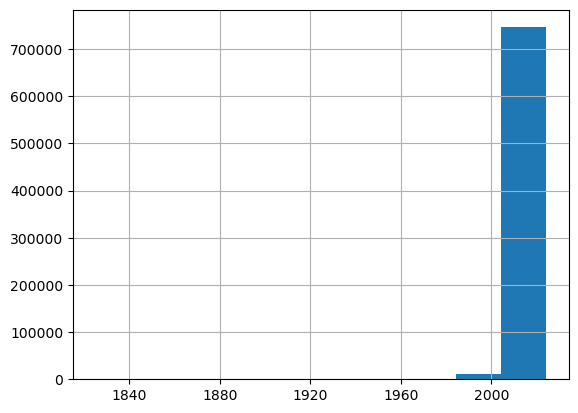

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## Pagkuha ng Istrakturang Datos

Tingnan natin kung anong uri ng impormasyon ang madali nating makukuha mula sa mga abstrak. Isa sa mga maaaring interesado tayo ay malaman kung anu-anong mga estratehiya sa paggamot ang umiiral, at kung paano ito nagbago sa paglipas ng panahon. Sa simula, maaari tayong manu-manong magtipon ng listahan ng mga posibleng gamot na ginagamit para gamutin ang COVID, pati na rin ang listahan ng mga diagnosis. Pagkatapos, susuriin natin ang mga ito at hahanapin ang mga kaukulang termino sa mga abstrak ng mga papel.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


Nagdagdag kami ng ilang mga kolum sa aming dataframe na naglalaman ng bilang ng beses na ang isang partikular na gamot o diagnosis ay lumalabas sa abstract.

> **Tandaan** na nagdadagdag kami ng espasyo sa unahan ng salita kapag naghahanap ng substring. Kung hindi namin ito gagawin, maaaring magresulta ito sa maling resulta, dahil ang *chloroquine* ay maaaring matagpuan din sa loob ng substring na *hydroxychloroquine*. Bukod dito, pinipilit naming i-convert ang kolum ng abstracts sa `str` upang maiwasan ang error - subukang tanggalin ang `str` at tingnan kung ano ang mangyayari.

Upang gawing mas madali ang pagproseso ng data, maaari nating kunin ang sub-frame na naglalaman lamang ng bilang ng mga gamot, at kalkulahin ang kabuuang bilang ng mga paglitaw. Sa ganitong paraan, makikita natin kung alin ang pinakapopular na gamot:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

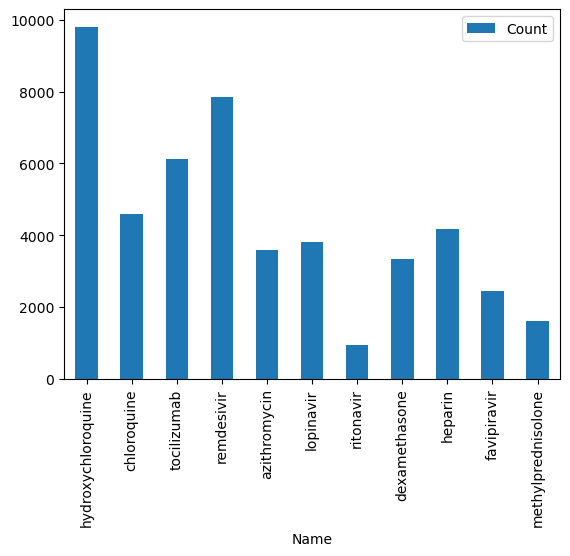

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## Paghahanap ng Mga Uso sa Estratehiya ng Paggamot

Sa halimbawa sa itaas, ginamit natin ang `sum` para sa lahat ng halaga, ngunit maaari rin natin itong gawin sa buwanang batayan:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

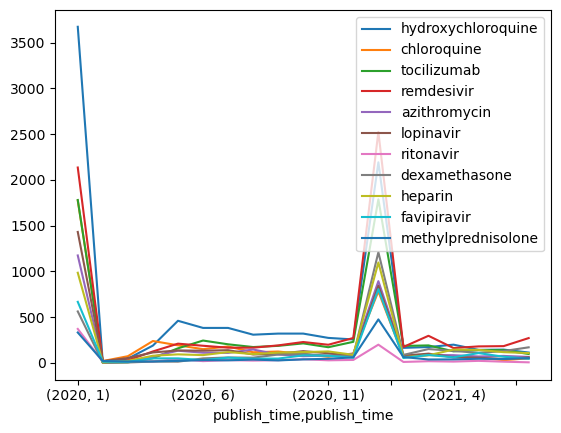

In [152]:
dfmt.plot()
plt.show()

Isang kawili-wiling obserbasyon ay may malalaking pagtaas sa dalawang lokasyon: Enero, 2020 at Enero, 2021. Ito ay sanhi ng katotohanang ang ilang mga papel ay walang malinaw na tinukoy na petsa ng publikasyon, at tinutukoy sila bilang Enero ng kani-kanilang taon.

Upang mas maunawaan ang datos, mag-visualize tayo ng iilang mga gamot lamang. "Buburahin" din natin ang datos para sa Enero, at pupunan ito ng ilang katamtamang halaga, upang makagawa ng mas maayos na grap:


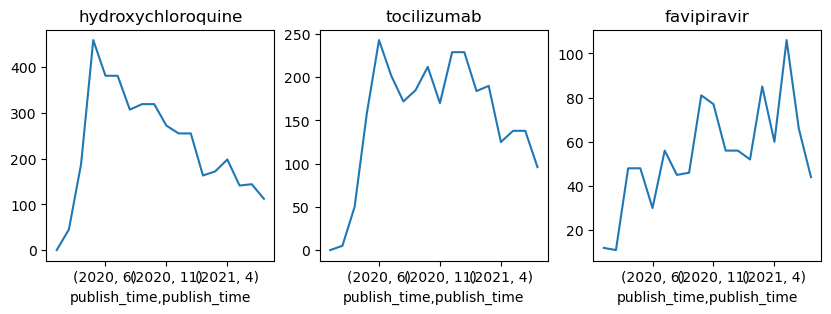

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

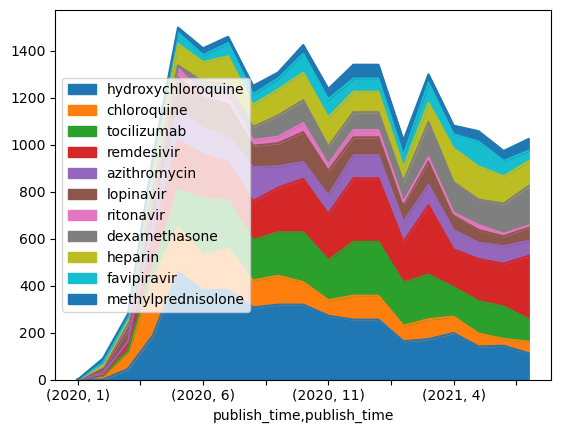

In [154]:
dfmt.plot.area()
plt.show()

Higit pa rito, maaari nating kalkulahin ang relatibong kasikatan sa porsyento:


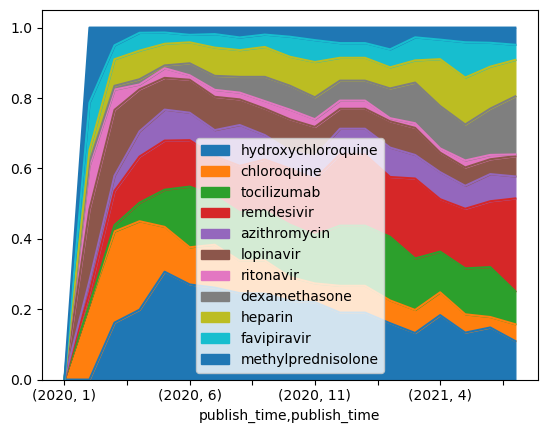

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## Pagtutugma ng Gamot at Diyagnosis

Isa sa mga pinaka-kawili-wiling relasyon na maaari nating suriin ay kung paano ginagamot ang iba't ibang diyagnosis gamit ang iba't ibang gamot. Upang maipakita ito, kailangan nating kalkulahin ang **co-occurence frequency map**, na magpapakita kung ilang beses nabanggit ang dalawang termino sa parehong papel.

Ang ganitong mapa ay karaniwang isang 2D matrix, na pinakamainam na kinakatawan ng **numpy array**. Kakalkulahin natin ang mapang ito sa pamamagitan ng pagdaan sa lahat ng mga abstrak, at itatala ang mga entity na naroroon:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

Isa sa mga paraan upang maipakita ang matrix na ito ay ang pagguhit ng isang **heatmap**:


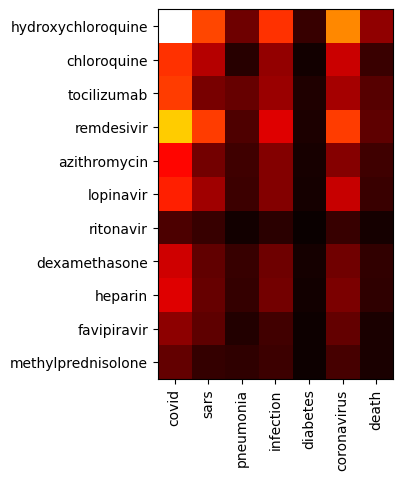

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

Gayunpaman, mas maganda ang magiging visualization gamit ang tinatawag na **Sankey** diagram! Walang built-in na suporta ang `matplotlib` para sa ganitong uri ng diagram, kaya kailangan nating gumamit ng [Plotly](https://plotly.com/python/) tulad ng ipinaliwanag [sa tutorial na ito](https://plotly.com/python/sankey-diagram/).

Upang makagawa ng Sankey diagram gamit ang Plotly, kailangan nating buuin ang mga sumusunod na listahan:
* Listahan na `all_nodes` ng lahat ng nodes sa graph, na maglalaman ng parehong mga gamot at diagnosis
* Listahan ng mga source at target indices - ang mga listahang ito ang magpapakita kung aling mga nodes ang pupunta sa kaliwa, at alin ang pupunta sa kanang bahagi ng diagram
* Listahan ng lahat ng links, bawat link ay binubuo ng:
   - Source index sa `all_nodes` array
   - Target index
   - Halaga na nagpapakita ng lakas ng link. Ito mismo ang halaga mula sa ating co-occurence matrix.
   - Opsyonal na kulay ng link. Magkakaroon tayo ng opsyon na i-highlight ang ilang mga termino para sa kalinawan

Ang pangkalahatang code upang gumuhit ng Sankey diagram ay nakaayos bilang isang hiwalay na `sankey` function, na tumatanggap ng dalawang listahan (mga kategorya ng source at target) at co-occurence matrix. Pinapayagan din nitong tukuyin ang threshold, at alisin ang lahat ng links na mas mahina kaysa sa threshold na iyon - ginagawa nitong mas simple ang diagram.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## Konklusyon

Nakita mo na maaari nating gamitin ang mga simpleng pamamaraan upang makakuha ng impormasyon mula sa mga hindi naka-istrukturang pinagmumulan ng datos, tulad ng teksto. Sa halimbawang ito, ginamit natin ang umiiral na listahan ng mga gamot, ngunit magiging mas makapangyarihan kung gagamit tayo ng mga teknolohiya ng natural language processing (NLP) upang magsagawa ng entity extraction mula sa teksto. Sa [blog post na ito](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) inilalarawan namin kung paano gamitin ang mga cloud service para sa entity extraction. Isa pang opsyon ay ang paggamit ng mga Python NLP library tulad ng [NLTK](https://www.nltk.org/) - ang isang paraan ng pagkuha ng impormasyon mula sa teksto gamit ang NLTK ay inilalarawan [dito](https://www.nltk.org/book/ch07.html).


## Hamon

Patuloy na pag-aralan ang datos ng papel tungkol sa COVID sa mga sumusunod na aspeto:

1. Gumawa ng co-occurrence matrix ng iba't ibang gamot, at tingnan kung aling mga gamot ang madalas na magkasama (hal., nabanggit sa isang abstract). Maaari mong baguhin ang code para sa paggawa ng co-occurrence matrix para sa mga gamot at mga diagnosis.
1. I-visualize ang matrix na ito gamit ang heatmap.
1. Bilang karagdagang hamon, maaari mong subukang i-visualize ang co-occurrence ng mga gamot gamit ang [chord diagram](https://en.wikipedia.org/wiki/Chord_diagram). [Ang library na ito](https://pypi.org/project/chord/) ay maaaring makatulong sa iyo na gumuhit ng chord diagram.
1. Bilang isa pang karagdagang hamon, subukang kunin ang mga dosage ng iba't ibang gamot (tulad ng **400mg** sa *uminom ng 400mg ng chloroquine araw-araw*) gamit ang regular expressions, at gumawa ng dataframe na nagpapakita ng iba't ibang dosage para sa iba't ibang gamot. **Tandaan**: isaalang-alang ang mga numerong halaga na malapit sa tekstuwal na lokasyon ng pangalan ng gamot.



---

**Paunawa**:  
Ang dokumentong ito ay isinalin gamit ang AI translation service na [Co-op Translator](https://github.com/Azure/co-op-translator). Bagama't sinisikap naming maging tumpak, pakitandaan na ang mga awtomatikong pagsasalin ay maaaring maglaman ng mga pagkakamali o hindi pagkakatugma. Ang orihinal na dokumento sa orihinal nitong wika ang dapat ituring na opisyal na sanggunian. Para sa mahalagang impormasyon, inirerekomenda ang propesyonal na pagsasalin ng tao. Hindi kami mananagot sa anumang hindi pagkakaunawaan o maling interpretasyon na maaaring magmula sa paggamit ng pagsasaling ito.
